# Digit generation with Restricted Boltzmann Machines in NumPy

In [1]:
import mnist
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

%matplotlib inline
np.random.seed(67)

In [2]:
print(f'sys.version: {sys.version}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]


## 1. Load MNIST

In [3]:
X_train = mnist.train_images().reshape(-1, 28 * 28) / 255.
y_train = mnist.train_labels()

print(f'X_train: dtype={X_train.dtype}, shape={X_train.shape}, min_max=[{X_train.min()}, {X_train.max()}]')
print(f'y_train: dtype={y_train.dtype}, shape={y_train.shape}, min_max=[{y_train.min()}, {y_train.max()}]')

X_train: dtype=float64, shape=(60000, 784), min_max=[0.0, 1.0]
y_train: dtype=uint8, shape=(60000,), min_max=[0, 9]


__Look at some images__

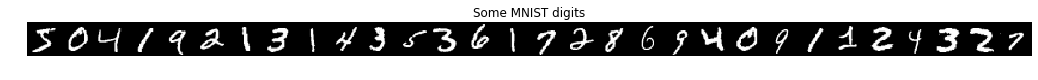

In [4]:
concat_imgs = np.concatenate(tuple(X_train[idx].reshape(28, 28) for idx in range(30)), axis=1)
plt.figure(figsize=(18, 9))
plt.imshow(concat_imgs, cmap='gray')
plt.axis('off')
plt.title('Some MNIST digits')
plt.show()

__Compute prop_on[:, i] - the proportion of training vectors in which unit *i* is on. These values will be used to initialize biases for visible units.__  
[A Practical Guide to Training Restricted Boltzmann Machines (Hinton, 2010)](http://www.cs.toronto.edu/~hinton/absps/guideTR.pdf)

prop_on.shape: (784,)


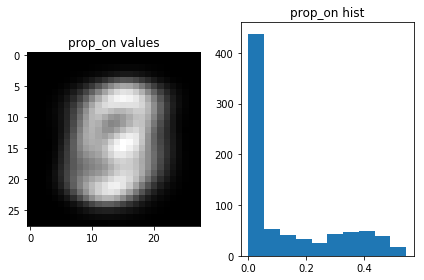

In [5]:
prop_on = np.mean(X_train, axis=0)
print(f'prop_on.shape: {prop_on.shape}')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(prop_on.reshape(28, 28), cmap='gray')
plt.title('prop_on values')

plt.subplot(1, 2, 2)
plt.hist(prop_on)
plt.title('prop_on hist')
plt.tight_layout()
plt.show()

## 2. RBM

In [6]:
# aux functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
class RBM:
    def __init__(self, vis_dim=784, hidden_dim=200, training_method='cd', prop_on=None):
        # init hidden layer
        self.h = np.zeros(hidden_dim)
        self.h_bias = np.zeros(hidden_dim) + 0.5
        
        # init visible layer
        self.v_bias = np.zeros(vis_dim)
        if prop_on is not None:
            # added 1e-20 for numerical stability
            self.c = np.log((1e-20 + prop_on) / (1e-20 + 1 - prop_on))
        
        # prepare params for training
        self.training_method = training_method
        self.w = 1e-2 * np.random.randn(hidden_dim, vis_dim)
        self.lr = 1e-2
    
    def up_vh(self, v):
        h_prob = np.dot(self.w, v.T) + self.h_bias[:, None]
        h = h_prob > np.random.uniform(0, 1, h_prob.shape)
        return h
    
    def down_hv(self, h):
        v_prob = np.dot(h.T, self.w) + self.v_bias[None, :]
        v = v_prob > np.random.uniform(0, 1, v_prob.shape)
        return v
    
    def train(self, X):
        pass

(array([7611.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         229.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

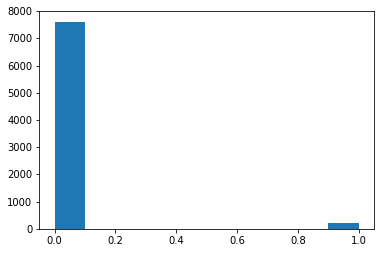

In [8]:
rbm = RBM(prop_on=None)
h = rbm.down_hv(np.random.uniform(size=(200,10)))
plt.figure()
plt.hist(h.flatten().astype(np.float32))

(array([ 953.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1047.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

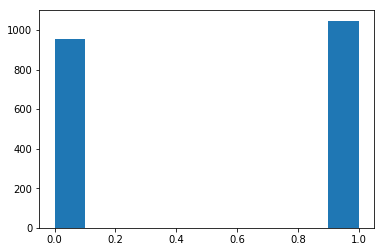

In [9]:
rbm = RBM()
h = rbm.up_vh(X_train[:10])
plt.figure()
plt.hist(h.flatten().astype(np.float32))